# Exploring the Effects of Aliasing in Frequency Domain

In this notebook, we explore the effects of aliasing when sampled frequencies exceed the Nyquist frequency.

We begin by setting the sampling rate to 20 Hz (`n = 0.05`). We select two sine waves with frequencies of 5 Hz and 15 Hz, and combine them using the `comb` function.

In the waveform plot, we can deselect both `sine1` and `sine2` plots, leaving only the `comb` plot open. This allows us to clearly see that `sine2`, despite having a frequency of 15 Hz (which is 5 Hz over the Nyquist frequency of 10 Hz), is aliased as a 5 Hz wave but with an inverted phase. By inverting the phase of `sine2` with `π`, we can now see that the `comb` waveform appears consistent, despite being a combination of two waves with different frequencies and phases.

In the magnitude DFT analysis plot, we observe a similar behavior. Interestingly, you can see the difference between the two waves in the phase spectrum of the DFT. The phase plot shows distinct phase shifts corresponding to the original and aliased frequencies. For `sine1` (5 Hz), the phase remains as expected, while for `sine2` (15 Hz), the aliasing effect causes the phase to shift by `π`, indicating the inversion. This distinction in the phase spectrum helps in identifying the presence and characteristics of the aliased signal.


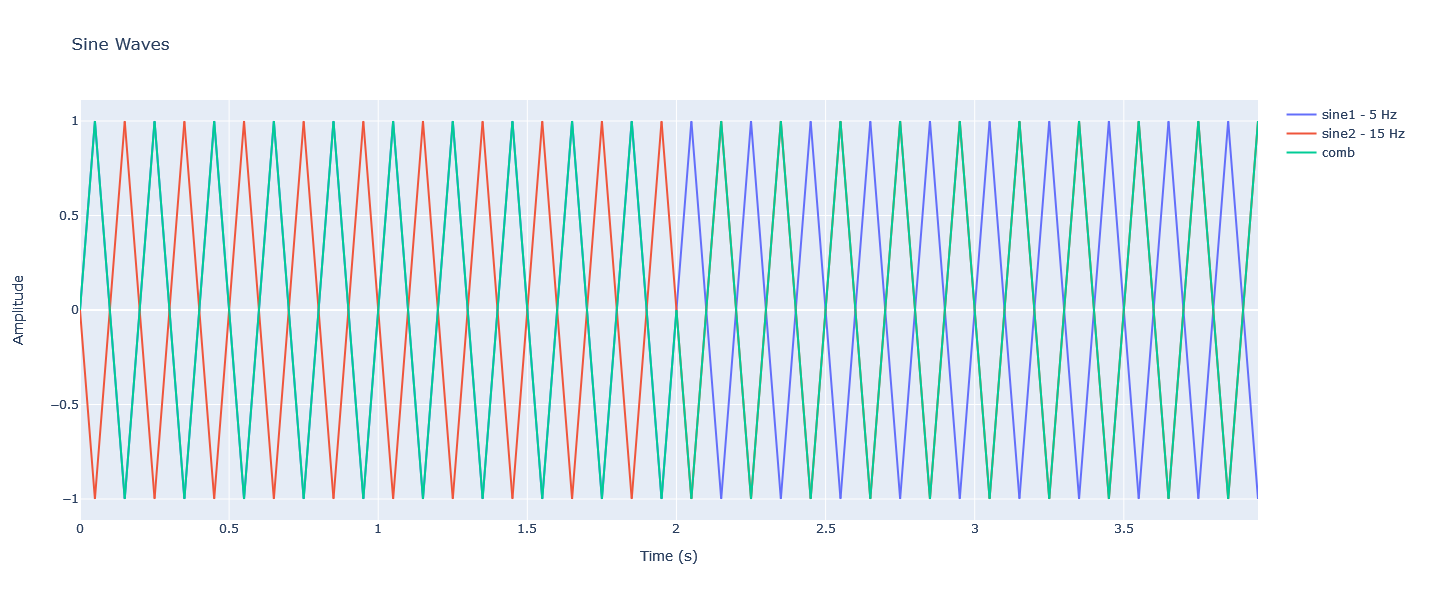

Sampling rate: 20.0 Hz
Nyquist frequency: 10.0 Hz
Total number of available sample points: 80
Frequency Resolution: 0.25 Hz


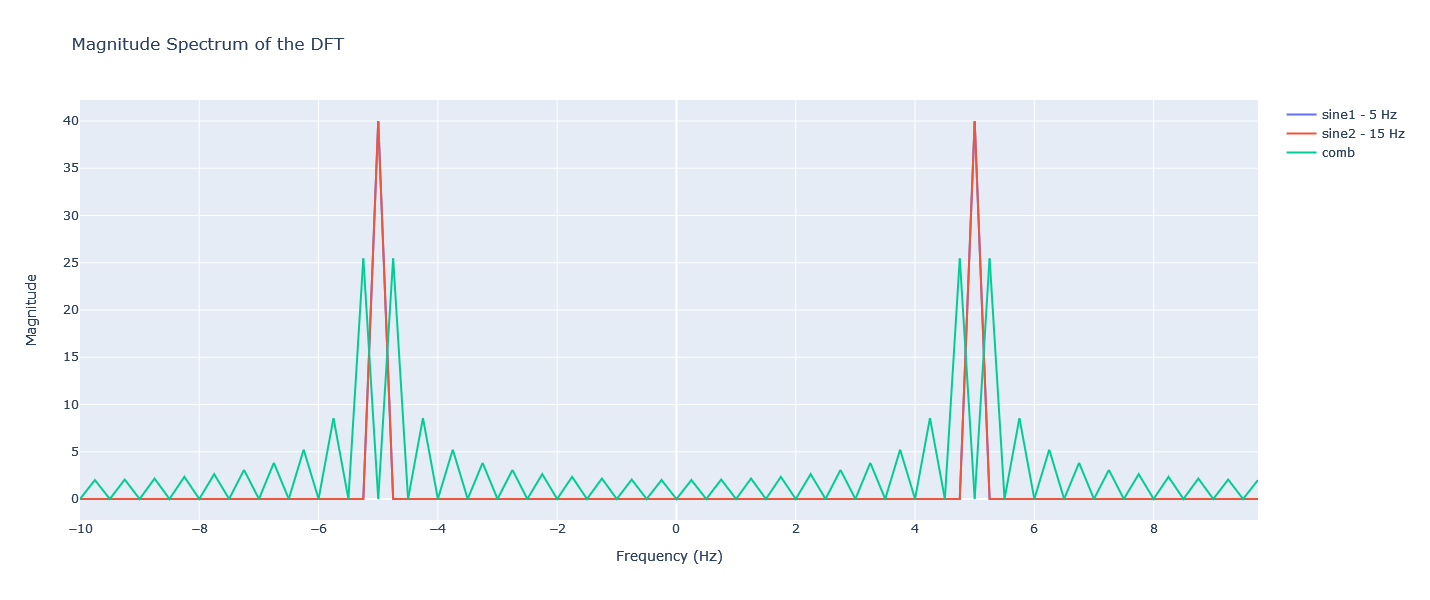

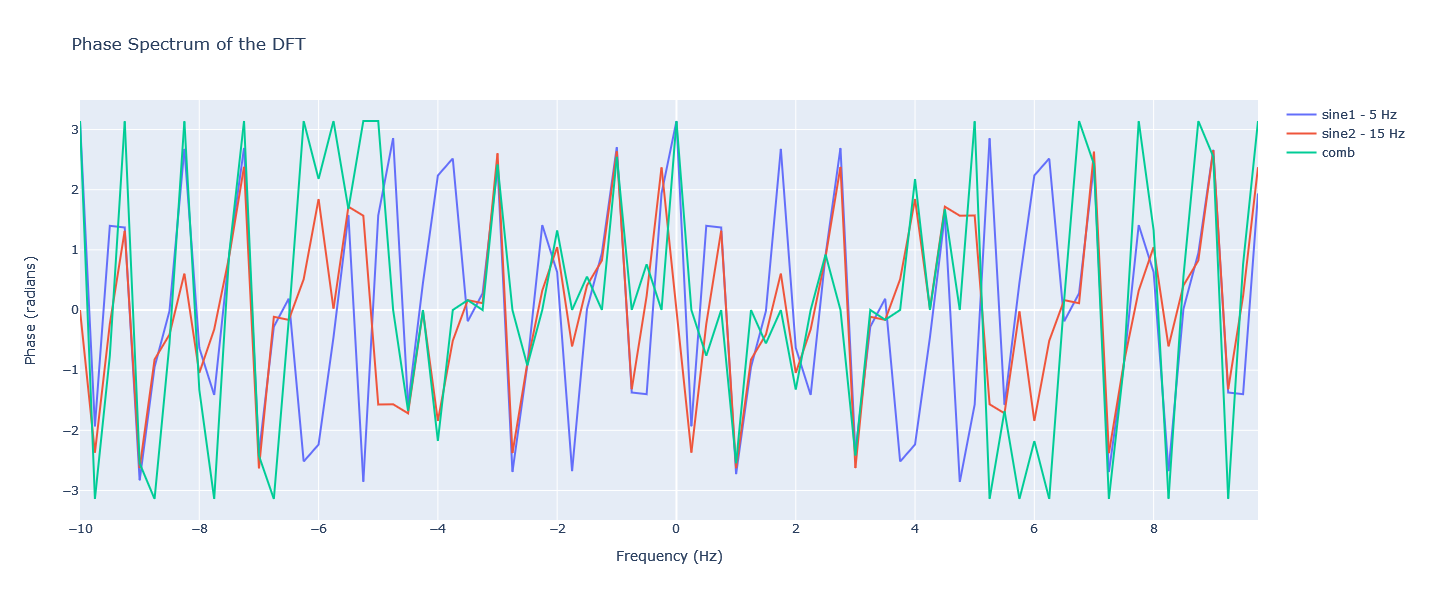

In [11]:
import sys
sys.path.append('../')

import numpy as np
import plotly.graph_objects as go
from py_scripts.waveform_utils import generate_waveforms, apply_window_to_waveforms, plot_waveforms

config = {
    # Time step in seconds
    'n': 0.05, 
    
    # Maximum time
    't_max': 4.0, 
    
    # Waveforms to show as list: 'sine1', 'sine2', 'am', 'fm', 'sum', 'comb'
    'selected_waveforms': ['sine1', 'sine2', 'comb'],
    
    # Parameters for sine wave 1: amp, freq, phase
    'amp1': 1.0, 'freq1': 5, 'phase1': 0*np.pi,
    
    # Parameters for sine wave 2: amp, freq, phase
    'amp2': 1.0, 'freq2': 15, 'phase2': 0*np.pi,
    
    # Set the modulation index for AM
    'index_am': 1,
    
    # Set the modulation index for FM
    'index_fm': 0.1,
    
    # Apply window function
    'apply_window': False,
    
    # Type of window function to apply. Reference here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html
    'window_type': 'blackman',
    
    # Add dotted lines overlay (disable if using high SR!)
    'add_dotted_lines': False
}

waveform_data, t = generate_waveforms(config)

if config['apply_window']:
    waveform_data = apply_window_to_waveforms(waveform_data, t, config['window_type'])

plot_waveforms(waveform_data, t, config)